# Kodowanie obrazów za pomocą "programów" w Gimpie

In [1]:
%matplotlib inline
import matplotlib.pylab as plt
from src.coding.coding import RandomEncoder, RandomDecoder
import random
import os
import numpy as np

IMAGES_PATH = '../data/image/scaled_images/'

def random_img():
    return random.choice(os.listdir(IMAGES_PATH))

def show_img(img_path):
    image_data = plt.imread(os.path.join(IMAGES_PATH, img_path))[:,:,:3]
    plt.imshow(image_data)
    
def calculate_loss(img_path, decoded_img):
    image_data = plt.imread(os.path.join(IMAGES_PATH, img_path))[:,:,:3]
    return np.sum(np.abs(image_data - decoded_img)), np.linalg.norm(image_data - decoded_img)

Using TensorFlow backend.


In [68]:
encoder = RandomEncoder()
decoder = RandomDecoder()

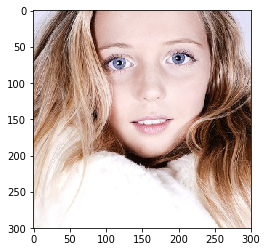

In [29]:
img_path = random_img()
show_img(img_path)

In [30]:
encoded, _ = encoder.encode(img_path, actions=681, size=100, render=True, to_bytes=True)

compressed to action vector of 30008 bytes
compressed with AC to 24754 bytes
compressed in 947.9363648891449 sec


decompressed from AC to 30008 bytes
decompressed in 22.688377380371094 sec


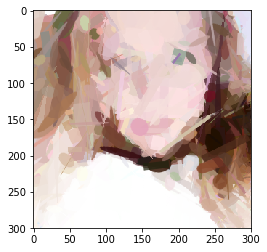

In [31]:
_, _ = decoder.decode(encoded, size=300, from_bytes=True)

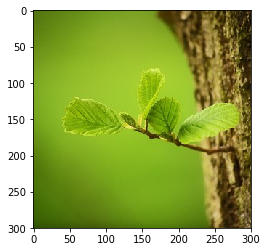

In [37]:
img_path = random_img()
show_img(img_path)

compressed to action vector of 30008 bytes
compressed with AC to 25268 bytes
compressed in 690.9454245567322 sec
decompressed from AC to 30008 bytes
decompressed in 10.155974388122559 sec


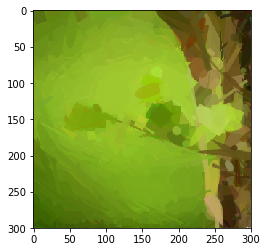

In [38]:
encoded, _ = encoder.encode(img_path, actions=681, size=100, render=True, to_bytes=True)
_, _ = decoder.decode(encoded, size=300, from_bytes=True)

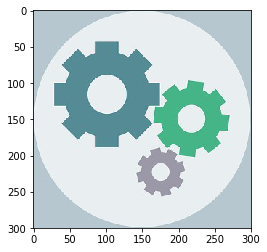

In [41]:
img_path = random_img()
show_img(img_path)

compressed to action vector of 30008 bytes
compressed with AC to 24751 bytes
compressed in 577.7743270397186 sec
decompressed from AC to 30008 bytes
decompressed in 10.461180925369263 sec


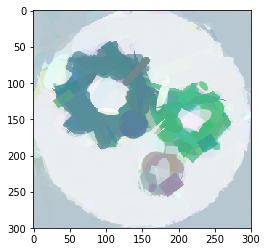

In [42]:
encoded, _ = encoder.encode(img_path, actions=681, size=100, render=True, to_bytes=True)
_, _ = decoder.decode(encoded, size=300, from_bytes=True)

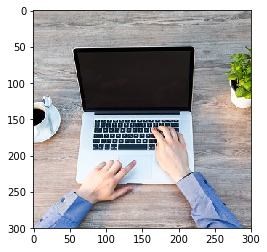

In [47]:
img_path = random_img()
show_img(img_path)

compressed to action vector of 4444 bytes
compressed with AC to 4558 bytes
compressed in 51.60397791862488 sec
b'\x00\x00\x03*\x00\x00\x00\x0e\x00\x00\x00\t\x00\x00\x00\x0c\x00\x00\x00\r\x00\x00\x00\x0e\x00\x00\x00\x08\x00\x00\x00\t\x00\x00\x00\x0c\x00\x00\x00\n\x00\x00\x00\x0c\x00\x00\x00\x05\x00\x00\x00\t\x00\x00\x00\x07\x00\x00\x00\x0f\x00\x00\x00\r\x00\x00\x00\x0c\x00\x00\x00\x0b\x00\x00\x00\x10\x00\x00\x00\x08\x00\x00\x00\x08\x00\x00\x00\x13\x00\x00\x00\t\x00\x00\x00\x12\x00\x00\x00\x0c'
decompressed from AC to 4444 bytes
decompressed in 4.476430654525757 sec


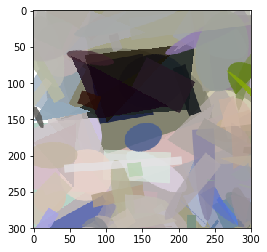

In [49]:
encoded, _ = encoder.encode(img_path, actions=100, size=50, render=True, to_bytes=True)
print(encoded[0:100])
_, _ = decoder.decode(encoded, size=300, from_bytes=True)

compressed to action vector of 4444 bytes
compressed with AC to 4589 bytes
compressed in 53.92529916763306 sec
b'\x00\x00\x02\xff\x00\x00\x00\x0b\x00\x00\x00\n\x00\x00\x00\r\x00\x00\x00\n\x00\x00\x00\t\x00\x00\x00\x07\x00\x00\x00\x0e\x00\x00\x00\x0b\x00\x00\x00\n\x00\x00\x00\x08\x00\x00\x00\r\x00\x00\x00\x0b\x00\x00\x00\x0b\x00\x00\x00\x0c\x00\x00\x00\x03\x00\x00\x00\x0f\x00\x00\x00\x08\x00\x00\x00\x10\x00\x00\x00\x10\x00\x00\x00\x12\x00\x00\x00\x0c\x00\x00\x00\x11\x00\x00\x00\x10\x00\x00\x00\x0b'
decompressed from AC to 4444 bytes
decompressed in 3.857656478881836 sec


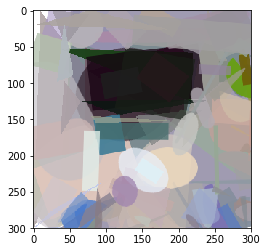

In [69]:
encoded, _ = encoder.encode(img_path, actions=100, size=50, render=True, to_bytes=True)
print(encoded[0:100])
_, _ = decoder.decode(encoded, size=300, from_bytes=True)

### COMPRESSION RATIO
$$0,06818 \cdot \frac{size^2}{actions}$$

Stała 0,06818 wynika z założenia reprezentacji obrazka wejściowego przez **3 B/pixel** (RGB) oraz obrazka skompresowanego przez **44 B/action** (4 bajty na numer akcji, 10 razy 4 bajty na argumenty akcji)

Przykładowo dla obrazka 100x100 i 100 akcji **compression ratio = 6,818**     

Skoro compression ratio zależy od ilości wykonanych akcji, istnieje maksymalna wartość, którą możemy użyć, aby skompresowany obrazek był mniejszy od obrazka wejściowego.   
$$maxActions=ceil(0.06818 \cdot size^2-1)$$
Przykładowo:   
obrazek 50x50 = max 170 akcji   
obrazek 100x100 = max 681 akcji        
obrazek 300x300 = max 6136 akcji

Liczbę możliwych do wykonania akcji można nieco zwiększyć poprzez zastosowanie dodatkowej kompresji na wynikowym ciągu wektorów akcji. Użyłam do tego celu gotowego kodera entropijnego wykorzystującego kodowanie arytmetyczne. Ma ono jednak sens jedynie po przekroczeniu pewnej liczby akcji, ponieważ w skompresowanym pliku przechowywana jest między innymi tablica prawdopodobieństw. Dla małych plików (mniej niż 200 akcji, ~ 8kB) kompresja spowoduje więc powstanie większego pliku niż plik wejściowy.

### COMPRESSION SPEED
![compression speed](../result/coding/encoding_time.png)

Relacja ilości akcji do czasu (100x100):
$$time = 0.55 \cdot actions + 3.47 [s]$$

![compression speed](../result/coding/encoding_time_sizes.png)

### DECOMPRESSION SPEED
![compression speed](../result/coding/decoding_time.png)

Relacja ilości akcji do czasu (100x100):
$$time = 0.01 \cdot actions + 2.6 [s]$$

![compression speed](../result/coding/decoding_time_sizes.png)

Zwiększając liczbę akcji (zmniejszając compression loss) czas kompresji rośnie około **5.5 razy szybciej** niż czas dekompresji.   
Zwiększając rozmiar kodowanego obrazka czas kompresji rośnie w dużym przybliżeniu około **28 razy szybciej** niż czas dekompresji.

#### Dekompresja do dowolnego rozmiaru

#### Działanie niedeterministyczne
input | output 1 | output 2
- | - | -
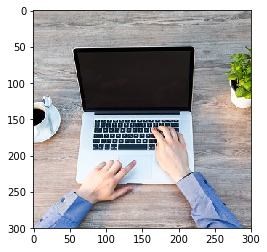 | 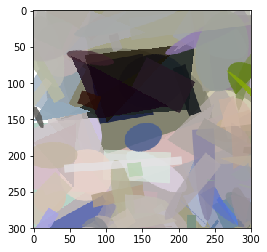 | 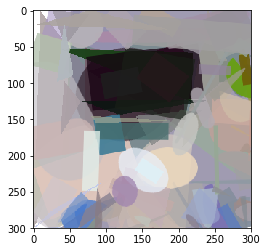

# Sieci konwolucyjne

In [51]:
from src.coding.coding import CnnEncoder, CnnDecoder
import numpy as np
    
def load_data(name):
    path = "../data/dataset/shape_small/"
    X = np.load(path + "%s_X.npy" % name, mmap_mode="r")
    Y = np.load(path + "%s_Y.npy" % name, mmap_mode="r")
    return X, Y

def show_source(i):
    plt.imshow(np.ones(X[i].shape) + X[i])

In [71]:
encoder = CnnEncoder()
decoder = CnnDecoder()

In [53]:
X, _ = load_data('test')

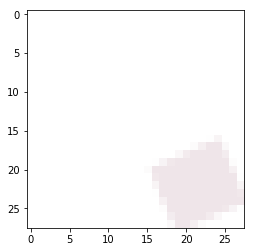

In [62]:
index = np.random.randint(0, X.shape[0])
show_source(index)

compressed in 0.15978264808654785 sec
(1, array([0.5540213 , 0.30107749, 0.45891708, 0.19931811, 0.6089749 ,
       0.6568471 , 0.4168069 , 0.35735887, 0.55650496], dtype=float32))
decompressed in 2.626220226287842 sec


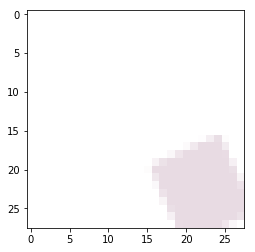

In [63]:
encoded = encoder.encode(X[index])
print(encoded)
decoder.decode(encoded, size=28)

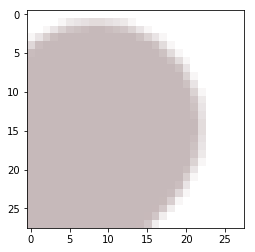

In [14]:
index = np.random.randint(0, X.shape[0])
show_source(index)

In [15]:
encoded = encoder.encode(X[index])
print(encoded)

compressed in 1.0605218410491943 sec
(2, array([0.49498618, 0.36093405, 0.35744056, 0.46738076, 0.2852464 ,
       0.599018  , 0.2694035 , 0.6574114 , 0.83537734], dtype=float32))


decompressed in 2.594597101211548 sec


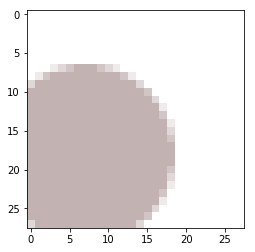

In [16]:
decoder.decode(encoded, size=28)

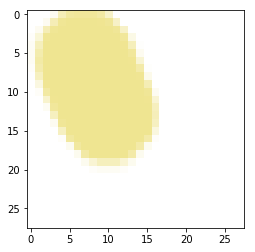

In [64]:
index = np.random.randint(0, X.shape[0])
show_source(index)

compressed in 0.5081331729888916 sec
(2, array([0.849812  , 0.82999116, 0.20214613, 0.6064758 , 0.3114485 ,
       0.34165952, 0.3202443 , 0.3209861 , 0.5053451 ], dtype=float32))
decompressed in 2.5380165576934814 sec


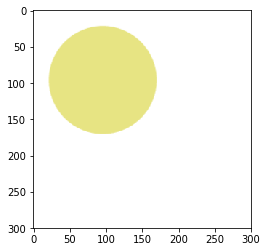

In [72]:
encoded = encoder.encode(X[index])
print(encoded)
decoder.decode(encoded, size=300)

### COMPRESSION RATIO
Bez zmian w stosunku do poprzedniej metody.

### COMPRESSION SPEED
Zysk czasowy w porównaniu z poprzednią metodą (pomijając jednorazowy koszt nauczenia pięciu sieci neuronowych). Mając nauczoną sieć jesteśmy w stanie uzyskać argumenty dla danej akcji "natychmiast" - jest to jedynie czas związany z wykonaniem kilku operacji macierzowych.

#### Kompresja obrazka o ustalonej wielkości

### DECOMPRESSION SPEED
Bez zmian w stosunku do poprzedniej metody.

#### Działanie deterministyczne

# Projekt indywidualny

Czego próbowałam:
1. Predykcja środka kwadratu
    * wieloklasowa klasyfikacja (2, 4, 9, 25 klas) - 100% accuracy
    * regresja (współrzędne x i y) - błąd ~2px dla obrazka 100x100
    
input | output
- | - 
![alt](data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAP4AAAD8CAYAAABXXhlaAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz%0AAAALEgAACxIB0t1+/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDIuMS4wLCBo%0AdHRwOi8vbWF0cGxvdGxpYi5vcmcvpW3flQAAC2BJREFUeJzt2l+IpfV9x/H3pzvZWA3iqqNsdrW7%0AwpJEAqlhsBpLKZrQxIbohQFDKEsR9iZtzB9ItL0IvasQorkogUUbliKJ6UaqSEiQjbnIzdYxSqOu%0AZrcqunGjI2hSctMs+fbiPJapHZ2zM+fMnOH7fsFw5nnOc3i+/Nj3nOc5e1JVSOrlDzZ7AEkbz/Cl%0AhgxfasjwpYYMX2rI8KWGDF9qaF3hJ/l4kmeTnEhy26SGkjRdWesXeJJsA34BfAw4CTwKfKaqnp7c%0AeJKmYW4dr70SOFFVzwEk+S5wA/C24V944YW1Z8+edZxS0jt54YUXeO2117LacesJfxfw0rLtk8Cf%0AvPWgJAeAAwCXXnopi4uL6zilpHeysLAw1nHrucdf6a/K/7tvqKqDVbVQVQvz8/PrOJ2kSVlP+CeB%0AS5Zt7wZeXt84kjbCesJ/FNiXZG+S7cDNwIOTGUvSNK35Hr+qTif5G+BHwDbgn6vqqYlNJmlq1vPh%0AHlX1A+AHE5pF0gbxm3tSQ4YvNWT4UkOGLzVk+FJDhi81ZPhSQ4YvNWT4UkOGLzVk+FJDhi81ZPhS%0AQ4YvNWT4UkOGLzVk+FJDhi81ZPhSQ4YvNWT4UkOGLzVk+FJDhi81ZPhSQ4YvNWT4UkOGLzVk+FJD%0Ahi81ZPhSQ4YvNWT4UkOGLzW0avhJLknySJJjSZ5Kcuuw//wkDyc5PjzumP64kiZhnHf808CXq+oD%0AwFXA55JcDtwGHKmqfcCRYVvSFrBq+FV1qqp+Nvz+X8AxYBdwA3BoOOwQcOO0hpQ0WWd0j59kD3AF%0AcBS4uKpOweiPA3DRpIeTNB1jh5/kPcD3gS9U1W/O4HUHkiwmWVxaWlrLjJImbKzwk7yLUfT3VtX9%0Aw+5Xkuwcnt8JvLrSa6vqYFUtVNXC/Pz8JGaWtE7jfKof4B7gWFV9Y9lTDwL7h9/3Aw9MfjxJ0zA3%0AxjHXAH8F/DzJE8O+vwP+EfhekluAF4FPT2dESZO2avhV9VMgb/P0dZMdR9JG8Jt7UkOGLzVk+FJD%0Ahi81NM6n+lqD0f+CahqqarNH2PJ8x5caMnypIcOXGjJ8qSHDlxoyfKkhw5caMnypIcOXGjJ8qSHD%0AlxoyfKkhw5caMnypIcOXGjJ8qSHDlxoyfKkhw5caMnypIcOXGjJ8qSHDlxoyfKkhw5caMnypIcOX%0AGjJ8qSHDlxoyfKmhscNPsi3J40keGrb3Jjma5HiS+5Jsn96YkibpTN7xbwWOLdu+A7izqvYBrwO3%0ATHIwSdMzVvhJdgN/Cdw9bAe4Fjg8HHIIuHEaA0qavHHf8e8CvgL8fti+AHijqk4P2yeBXSu9MMmB%0AJItJFpeWltY1rKTJWDX8JJ8EXq2qx5bvXuHQWun1VXWwqhaqamF+fn6NY0qapLkxjrkG+FSS64Gz%0AgHMZXQGcl2RueNffDbw8vTElTdKq7/hVdXtV7a6qPcDNwI+r6rPAI8BNw2H7gQemNqWkiVrP/+N/%0AFfhSkhOM7vnvmcxIkqZtnEv9/1VVPwF+Mvz+HHDl5EeSNG1+c09qyPClhgxfasjwpYYMX2rI8KWG%0ADF9qyPClhgxfasjwpYYMX2rI8KWGDF9qyPClhgxfasjwpYYMX2rI8KWGDF9qyPClhgxfasjwpYYM%0AX2rI8KWGDF9qyPClhgxfasjwpYYMX2rI8KWGDF9qyPClhgxfasjwpYbGCj/JeUkOJ3kmybEkVyc5%0AP8nDSY4PjzumPaykyRj3Hf+bwA+r6v3Ah4BjwG3AkaraBxwZtiVtAauGn+Rc4M+AewCq6r+r6g3g%0ABuDQcNgh4MZpDSlpssZ5x78MWAK+neTxJHcnOQe4uKpOAQyPF01xTkkTNE74c8CHgW9V1RXAbzmD%0Ay/okB5IsJllcWlpa45iSJmmc8E8CJ6vq6LB9mNEfgleS7AQYHl9d6cVVdbCqFqpqYX5+fhIzS1qn%0AVcOvql8BLyV537DrOuBp4EFg/7BvP/DAVCaUNHFzYx73t8C9SbYDzwF/zeiPxveS3AK8CHx6OiNK%0AmrSxwq+qJ4CFFZ66brLjSNoI477j6wxV1WaPIL0tv7IrNWT4UkOGLzVk+FJDhi81ZPhSQ4YvNWT4%0AUkOGLzVk+FJDhi81ZPhSQ4YvNWT4UkOGLzVk+FJDhi81ZPhSQ4YvNWT4UkOGLzVk+FJDhi81ZPhS%0AQ4YvNWT4UkOGLzVk+FJDhi81ZPhSQ4YvNWT4UkOGLzVk+FJDY4Wf5ItJnkryZJLvJDkryd4kR5Mc%0AT3Jfku3THlbSZKwafpJdwOeBhar6ILANuBm4A7izqvYBrwO3THNQSZMz7qX+HPCHSeaAs4FTwLXA%0A4eH5Q8CNkx9P0jSsGn5V/RL4OvAio+B/DTwGvFFVp4fDTgK7Vnp9kgNJFpMsLi0tTWZqSesyzqX+%0ADuAGYC/wXuAc4BMrHForvb6qDlbVQlUtzM/Pr2dWSRMyzqX+R4Hnq2qpqn4H3A98BDhvuPQH2A28%0APKUZJU3YOOG/CFyV5OwkAa4DngYeAW4ajtkPPDCdESVN2jj3+EcZfYj3M+Dnw2sOAl8FvpTkBHAB%0AcM8U55Q0QXOrHwJV9TXga2/Z/Rxw5cQnkjR1fnNPasjwpYYMX2rI8KWGDF9qyPClhgxfasjwpYYM%0AX2rI8KWGDF9qyPClhgxfasjwpYYMX2rI8KWGDF9qyPClhgxfasjwpYYMX2rI8KWGDF9qyPClhgxf%0AasjwpYYMX2rI8KWGDF9qyPClhgxfasjwpYYMX2rI8KWGDF9qyPClhgxfaihVtXEnS5aA3wKvbdhJ%0A1+dCts6ssLXm3UqzwtaZ94+qan61gzY0fIAki1W1sKEnXaOtNCtsrXm30qyw9eZdjZf6UkOGLzW0%0AGeEf3IRzrtVWmhW21rxbaVbYevO+ow2/x5e0+bzUlxrasPCTfDzJs0lOJLlto847riSXJHkkybEk%0ATyW5ddh/fpKHkxwfHnds9qxvSrItyeNJHhq29yY5Osx6X5Ltmz3jm5Kcl+RwkmeGNb56Vtc2yReH%0AfwNPJvlOkrNmeW3XYkPCT7IN+CfgE8DlwGeSXL4R5z4Dp4EvV9UHgKuAzw0z3gYcqap9wJFhe1bc%0AChxbtn0HcOcw6+vALZsy1cq+Cfywqt4PfIjR3DO3tkl2AZ8HFqrqg8A24GZme23PXFVN/Qe4GvjR%0Asu3bgds34tzrmPkB4GPAs8DOYd9O4NnNnm2YZTejWK4FHgLC6Asmcyut+SbPei7wPMNnSsv2z9za%0AAruAl4Dzgblhbf9iVtd2rT8bdan/5mK+6eSwbyYl2QNcARwFLq6qUwDD40WbN9n/cRfwFeD3w/YF%0AwBtVdXrYnqU1vgxYAr493JrcneQcZnBtq+qXwNeBF4FTwK+Bx5jdtV2TjQo/K+ybyf9OSPIe4PvA%0AF6rqN5s9z0qSfBJ4taoeW757hUNnZY3ngA8D36qqKxh9bXvTL+tXMnzOcAOwF3gvcA6jW9S3mpW1%0AXZONCv8kcMmy7d3Ayxt07rEleRej6O+tqvuH3a8k2Tk8vxN4dbPmW+Ya4FNJXgC+y+hy/y7gvCRz%0AwzGztMYngZNVdXTYPszoD8Esru1HgeeraqmqfgfcD3yE2V3bNdmo8B8F9g2fjG5n9GHJgxt07rEk%0ACXAPcKyqvrHsqQeB/cPv+xnd+2+qqrq9qnZX1R5Ga/njqvos8Ahw03DYTMwKUFW/Al5K8r5h13XA%0A08zg2jK6xL8qydnDv4k3Z53JtV2zDfzQ5HrgF8B/An+/2R9urDDfnzK6fPsP4Inh53pG985HgOPD%0A4/mbPetb5v5z4KHh98uAfwdOAP8KvHuz51s25x8Di8P6/huwY1bXFvgH4BngSeBfgHfP8tqu5cdv%0A7kkN+c09qSHDlxoyfKkhw5caMnypIcOXGjJ8qSHDlxr6HxQpqQo/MysnAAAAAElFTkSuQmCC) | ![alt](data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAP4AAAD8CAYAAABXXhlaAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz%0AAAALEgAACxIB0t1+/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDIuMS4wLCBo%0AdHRwOi8vbWF0cGxvdGxpYi5vcmcvpW3flQAAC2dJREFUeJzt2l+IpfV9x/H3x51srAZx1VE2u9pd%0AYUkigdQwWI2lFE1oYkP0woAhlKUIe5M25g8k2l6E3lUI0VyUwKINS5HEdCNVJCTIxlzkZusYpVFX%0As1sVnbjRETQpuWmW/fbiPJapmThnZ86ZP3zfLxjOPM95Ds+XH/M+5zlnTqoKSb2ctdEDSFp/hi81%0AZPhSQ4YvNWT4UkOGLzVk+FJDawo/yceTPJfkRJLbJzWUpOnKar/Ak2Qb8AvgY8AC8Bjwmap6ZnLj%0ASZqGmTU89irgRFU9D5Dku8CNwB8M/6KLLqo9e/as4ZSS3smLL77I66+/npWOW0v4u4CXl2wvAH/6%0A9oOSHAAOAFx22WXMz8+v4ZSS3snc3NxYx63lPf5yzyq/976hqg5W1VxVzc3Ozq7hdJImZS3hLwCX%0ALtneDbyytnEkrYe1hP8YsC/J3iTbgVuAhyYzlqRpWvV7/Ko6leRvgR8B24B/qaqnJzaZpKlZy4d7%0AVNUPgB9MaBZJ68Rv7kkNGb7UkOFLDRm+1JDhSw0ZvtSQ4UsNGb7UkOFLDRm+1JDhSw0ZvtSQ4UsN%0AGb7UkOFLDRm+1JDhSw0ZvtSQ4UsNGb7UkOFLDRm+1JDhSw0ZvtSQ4UsNGb7UkOFLDRm+1JDhSw0Z%0AvtSQ4UsNGb7UkOFLDRm+1NCK4Se5NMmjSY4leTrJbcP+C5I8kuT4cLtj+uNKmoRxXvFPAV+uqg8A%0AVwOfS3IFcDtwpKr2AUeGbUlbwIrhV9XJqvrZ8Pt/A8eAXcCNwKHhsEPATdMaUtJkndF7/CR7gCuB%0Ao8AlVXUSRk8OwMWTHk7SdIwdfpL3AN8HvlBVvzmDxx1IMp9kfnFxcTUzSpqwscJP8i5G0d9XVQ8M%0Au19NsnO4fyfw2nKPraqDVTVXVXOzs7OTmFnSGo3zqX6Ae4FjVfWNJXc9BOwfft8PPDj58SRNw8wY%0Ax1wL/DXw8yRPDvv+Hvgn4HtJbgVeAj49nRElTdqK4VfVT4H8gbuvn+w4ktaD39yTGjJ8qSHDlxoy%0AfKmhcT7V1xqcdZbPrdNy+vTpjR5hy/KvUmrI8KWGDF9qyPClhgxfasjwpYYMX2rI8KWGDF9qyPCl%0AhgxfasjwpYYMX2rI8KWGDF9qyPClhgxfasjwpYYMX2rI8KWGDF9qyPClhgxfasjwpYYMX2rI8KWG%0ADF9qyPClhgxfasjwpYbGDj/JtiRPJHl42N6b5GiS40nuT7J9emNKmqQzecW/DTi2ZPtO4K6q2ge8%0AAdw6ycEkTc9Y4SfZDfwVcM+wHeA64PBwyCHgpmkMKGnyxn3Fvxv4CnB62L4QeLOqTg3bC8Cu5R6Y%0A5ECS+STzi4uLaxpW0mSsGH6STwKvVdXjS3cvc2gt9/iqOlhVc1U1Nzs7u8oxJU3SzBjHXAt8KskN%0AwNnAeYyuAM5PMjO86u8GXpnemJImacVX/Kq6o6p2V9Ue4Bbgx1X1WeBR4ObhsP3Ag1ObUtJEreX/%0A+F8FvpTkBKP3/PdOZiRJ0zbOpf7/qaqfAD8Zfn8euGryI0maNr+5JzVk+FJDhi81ZPhSQ4YvNWT4%0AUkOGLzVk+FJDhi81ZPhSQ4YvNWT4UkOGLzVk+FJDhi81ZPhSQ4YvNWT4UkOGLzVk+FJDhi81ZPhS%0AQ4YvNWT4UkOGLzVk+FJDhi81ZPhSQ4YvNWT4UkOGLzVk+FJDhi81ZPhSQ2OFn+T8JIeTPJvkWJJr%0AklyQ5JEkx4fbHdMeVtJkjPuK/03gh1X1fuBDwDHgduBIVe0DjgzbkraAFcNPch7w58C9AFX1P1X1%0AJnAjcGg47BBw07SGlDRZ47ziXw4sAt9O8kSSe5KcC1xSVScBhtuLpzinpAkaJ/wZ4MPAt6rqSuC3%0AnMFlfZIDSeaTzC8uLq5yTEmTNE74C8BCVR0dtg8zeiJ4NclOgOH2teUeXFUHq2ququZmZ2cnMbOk%0ANVox/Kr6FfBykvcNu64HngEeAvYP+/YDD05lQkkTNzPmcX8H3JdkO/A88DeMnjS+l+RW4CXg09MZ%0AUdKkjRV+VT0JzC1z1/WTHUfSevCbe1JDhi81ZPhSQ4YvNWT4UkPj/jtPq3T69OmNHkH6Pb7iSw0Z%0AvtSQ4UsNGb7UkOFLDRm+1JDhSw0ZvtSQ4UsNGb7UkOFLDRm+1JDhSw0ZvtSQ4UsNGb7UkOFLDRm+%0A1JDhSw0ZvtSQ4UsNGb7UkOFLDRm+1JDhSw0ZvtSQ4UsNGb7UkOFLDY0VfpIvJnk6yVNJvpPk7CR7%0AkxxNcjzJ/Um2T3tYSZOxYvhJdgGfB+aq6oPANuAW4E7grqraB7wB3DrNQSVNzriX+jPAHyWZAc4B%0ATgLXAYeH+w8BN01+PEnTsGL4VfVL4OvAS4yC/zXwOPBmVZ0aDlsAdi33+CQHkswnmV9cXJzM1JLW%0AZJxL/R3AjcBe4L3AucAnljm0lnt8VR2sqrmqmpudnV3LrJImZJxL/Y8CL1TVYlX9DngA+Ahw/nDp%0AD7AbeGVKM0qasHHCfwm4Osk5SQJcDzwDPArcPByzH3hwOiNKmrRx3uMfZfQh3s+Anw+POQh8FfhS%0AkhPAhcC9U5xT0gTNrHwIVNXXgK+9bffzwFUTn0jS1PnNPakhw5caMnypIcOXGjJ8qSHDlxoyfKkh%0Aw5caMnypIcOXGjJ8qSHDlxoyfKkhw5caMnypIcOXGjJ8qSHDlxoyfKkhw5caMnypIcOXGjJ8qSHD%0AlxoyfKkhw5caMnypIcOXGjJ8qSHDlxoyfKkhw5caMnypIcOXGjJ8qSHDlxoyfKmhVNX6nSxZBH4L%0AvL5uJ12bi9g6s8LWmncrzQpbZ94/rqrZlQ5a1/ABksxX1dy6nnSVttKssLXm3UqzwtabdyVe6ksN%0AGb7U0EaEf3ADzrlaW2lW2FrzbqVZYevN+47W/T2+pI3npb7U0LqFn+TjSZ5LciLJ7et13nEluTTJ%0Ao0mOJXk6yW3D/guSPJLk+HC7Y6NnfUuSbUmeSPLwsL03ydFh1vuTbN/oGd+S5Pwkh5M8O6zxNZt1%0AbZN8cfgbeCrJd5KcvZnXdjXWJfwk24B/Bj4BXAF8JskV63HuM3AK+HJVfQC4GvjcMOPtwJGq2gcc%0AGbY3i9uAY0u27wTuGmZ9A7h1Q6Za3jeBH1bV+4EPMZp7061tkl3A54G5qvogsA24hc29tmeuqqb+%0AA1wD/GjJ9h3AHetx7jXM/CDwMeA5YOewbyfw3EbPNsyym1Es1wEPA2H0BZOZ5dZ8g2c9D3iB4TOl%0AJfs33doCu4CXgQuAmWFt/3Kzru1qf9brUv+txXzLwrBvU0qyB7gSOApcUlUnAYbbizdusv/nbuAr%0AwOlh+0Lgzao6NWxvpjW+HFgEvj28NbknyblswrWtql8CXwdeAk4CvwYeZ/Ou7aqsV/hZZt+m/HdC%0AkvcA3we+UFW/2eh5lpPkk8BrVfX40t3LHLpZ1ngG+DDwraq6ktHXtjf8sn45w+cMNwJ7gfcC5zJ6%0Ai/p2m2VtV2W9wl8ALl2yvRt4ZZ3OPbYk72IU/X1V9cCw+9UkO4f7dwKvbdR8S1wLfCrJi8B3GV3u%0A3w2cn2RmOGYzrfECsFBVR4ftw4yeCDbj2n4UeKGqFqvqd8ADwEfYvGu7KusV/mPAvuGT0e2MPix5%0AaJ3OPZYkAe4FjlXVN5bc9RCwf/h9P6P3/huqqu6oqt1VtYfRWv64qj4LPArcPBy2KWYFqKpfAS8n%0Aed+w63rgGTbh2jK6xL86yTnD38Rbs27KtV21dfzQ5AbgF8B/Af+w0R9uLDPfnzG6fPtP4Mnh5wZG%0A752PAMeH2ws2eta3zf0XwMPD75cD/wGcAP4NePdGz7dkzj8B5of1/Xdgx2ZdW+AfgWeBp4B/Bd69%0Amdd2NT9+c09qyG/uSQ0ZvtSQ4UsNGb7UkOFLDRm+1JDhSw0ZvtTQ/wK9vakHruNQAQAAAABJRU5E%0ArkJggg==)
    
2. Predykcja wszystkich argumentów
    * kolor całkiem nieźle
    * położenie i wielkość mniej więcej (najgorzej dla trójkątów)
    * obrót kiepsko
3. Porzucenie pracy nad supervised learningiem
4. Reinforcement learning
    * inspiracja pracą [Synthesizing Programs for Images using Reinforced Adversarial Learning](https://arxiv.org/abs/1804.01118) (kwiecień 2018)
    
#### MNIST & Omniglot
![alt](https://storage.googleapis.com/deepmind-live-cms/documents/mnsit%2526omniglot.gif)

#### CelebA
![alt](https://storage.googleapis.com/deepmind-live-cms/documents/celeb_generating_images.gif)
   